In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.spatial as spa

# 1- Importing Data

In [80]:
# read data from csv file
data_set = np.genfromtxt("hw09_data_set.csv", delimiter = ",")
# get X 
X = data_set
N = X.shape[0]
D = X.shape[1]

# 2- Calculating B

In [81]:
# connectivity matrix
def calculate_B(delta):
    connectivity_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(i+1, N):
            euclidian_distance = math.sqrt(np.sum((X[i] - X[j])**2))
            if euclidian_distance < delta:
                connectivity_matrix[i][j] = 1
                connectivity_matrix[j][i] = 1
    return connectivity_matrix

B = calculate_B(2)


Text(0, 0.5, 'x2')

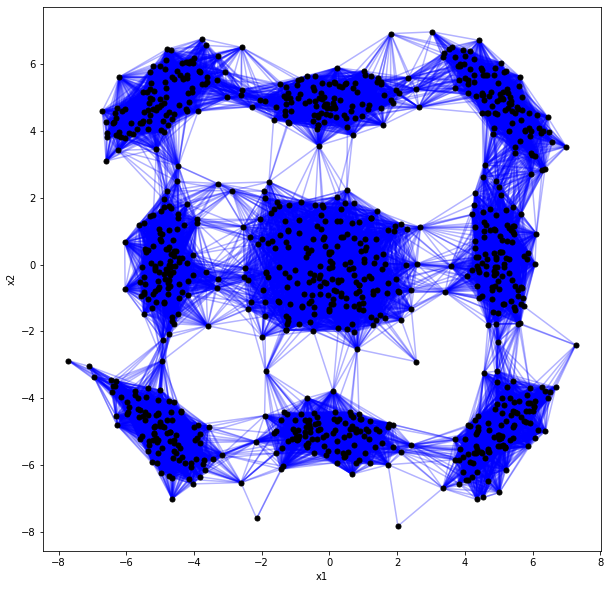

In [70]:
# plot connectivity matrix
plt.figure(figsize=(10, 10))
for i in range(N):
        for j in range(i+1, N):
            if B[i][j] == 1:
                x = [X[i][0], X[j][0]]
                y = [X[i][1], X[j][1]]
                plt.plot(x,y, "b-", alpha= 0.3)
plt.plot(X[:,0], X[:,1],"k." ,markersize = 10)
    
plt.xlabel("x1")
plt.ylabel("x2")

# 3- Calculating D and L

In [71]:
# neighborhood matrix
def calculate_D():
    D = np.zeros((N, N))
    for i in range(N):
        no_neighbors = np.sum(B[i])
        D[i][i] = no_neighbors
    return D

neighborhood_matrix = calculate_D()         

In [72]:
# Laplacian matrix
def calculate_L():
    L = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            L[i][j] = neighborhood_matrix[i][j]-B[i][j]
    return L

def normalize_L():
    L_symmetric = np.zeros((N, N))
    I = np.identity(N)

    D_inv = np.linalg.inv(neighborhood_matrix)
    D_inv_sqrt = np.sqrt(D_inv)
    L_symmetric =I- (np.matmul(np.matmul(D_inv_sqrt,B),D_inv_sqrt))
    
    return L_symmetric

L = calculate_L()
# print(L[0:5, 0:5])
L_symmetric = normalize_L()
print(L_symmetric[0:5, 0:5])

[[ 1.          0.         -0.01277024 -0.01689343 -0.01277024]
 [ 0.          1.         -0.01683588  0.          0.        ]
 [-0.01277024 -0.01683588  1.          0.         -0.01190476]
 [-0.01689343  0.          0.          1.          0.        ]
 [-0.01277024  0.         -0.01190476  0.          1.        ]]


# 4- Calculating Z

In [73]:
# eigenvectors of L_symmetric
def r_smallest_eigenectors(R):
    eigenvalues, eigenvectors = np.linalg.eig(L_symmetric)
    r_smallest_values = np.argsort(eigenvalues)[: R+1]
    r_smallest_vectors = eigenvectors[:, r_smallest_values[1:R+1]]
    return r_smallest_vectors

Z = r_smallest_eigenectors(5)
print(Z[0:5, 0:5])

[[ 0.02492986 -0.03008423 -0.00946604  0.05116243  0.0229564 ]
 [ 0.01590745 -0.02367529 -0.00235798  0.037579    0.0141235 ]
 [ 0.02601003 -0.03273215 -0.00886993  0.05526008  0.02411414]
 [ 0.02147879 -0.02190107 -0.01054254  0.03633024  0.0175098 ]
 [ 0.02624211 -0.03262591 -0.00925994  0.05524827  0.02432336]]


# 5- Running k-Means Clustering

In [74]:
# Algorithm steps from Lab 11
def update_centroids(memberships, X):
    N = X.shape[0]
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K, False),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,:], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    Dist = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(Dist, axis = 0)
    return(memberships)

In [75]:
K = 9
initial_centroids = [Z[242,:], Z[528,:], Z[570,:] ,Z[590,:] ,Z[648,:] ,Z[667,:] ,Z[774,:] ,Z[891,:] ,Z[955, :]]

In [76]:
# Iterations from Lab 11
centroids = initial_centroids
memberships = update_memberships(centroids, Z)
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, Z)
    if np.alltrue(centroids == old_centroids):
        break

    old_memberships = memberships
    memberships = update_memberships(centroids, Z)
    if np.alltrue(memberships == old_memberships):
        break
    iteration = iteration + 1

Iteration#1:
Iteration#2:
Iteration#3:
Iteration#4:


# 6- Drawing Clustering Result

In [77]:
# visulaization from Lab 11

def plot_result(centroids, memberships, X):
    plt.figure(figsize=(10, 10))
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

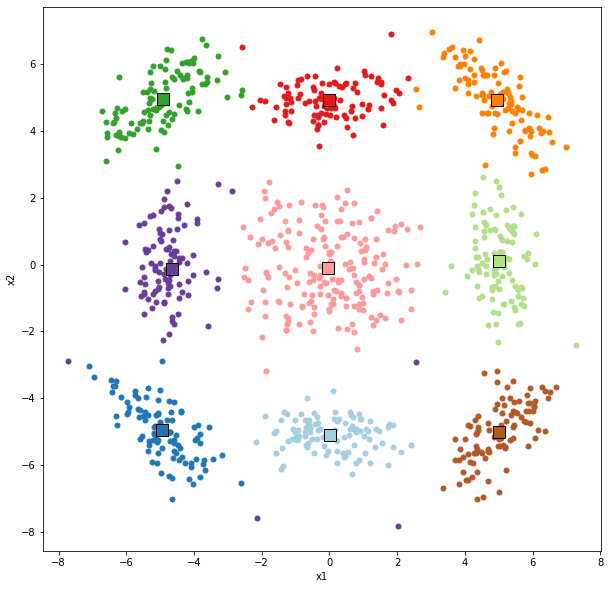

In [78]:
final_centroids = update_centroids(memberships, X)
plot_result(final_centroids, memberships, X)